## Part I: Setting Up the Data

## Q 1

In [1]:
import time
start_time = time.time()
import pandas as pd
import csv
import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
elapsed_time = time.time()-start_time

In [2]:
elapsed_time

3.109161853790283

In [5]:
start_time = time.time()
tweets_us_df = pd.read_csv("tweets_us_states1.csv")
us_states = pd.read_excel('us_states.xlsx')

In [6]:
tweets_us_df.drop(['Unnamed: 0', "Unnamed: 0.1", 'Unnamed: 0.1.1'], axis = 1, inplace = True)

In [7]:
states = list(us_states["state"])

state = []
for item in states:
    item = item.lower()
    state.append(item)
us_states["state"] = state

location = list(tweets_us_df["location"])
locate = []
for item in location:
    item = item.lower()
    locate.append(item)
tweets_us_df["location"] = locate

#There are 8057245 observations in the tweets_us_data
elapsed_time = time.time()-start_time

In [8]:
start_time = time.time()
states = list(us_states['state'])
tweets_us_df["location"]= tweets_us_df["location"].str.replace(',','')
locations = list(tweets_us_df["location"])
us_states.reset_index(inplace = True)
tweets_us_df.reset_index(inplace = True)

In [9]:
keep_indexes = []
for i in range(len(locations)):
    if i%10000 == 0:
        print(str(i) + ' / ' + str(len(locations)))
    true = ''
    for state in states:
        if state in locations[i]:
            true = "true"
            keep_indexes.append(i)
            break

0 / 8057245
10000 / 8057245
20000 / 8057245
30000 / 8057245
40000 / 8057245
50000 / 8057245
60000 / 8057245
70000 / 8057245
80000 / 8057245
90000 / 8057245
100000 / 8057245
110000 / 8057245
120000 / 8057245
130000 / 8057245
140000 / 8057245
150000 / 8057245
160000 / 8057245
170000 / 8057245
180000 / 8057245
190000 / 8057245
200000 / 8057245
210000 / 8057245
220000 / 8057245
230000 / 8057245
240000 / 8057245
250000 / 8057245
260000 / 8057245
270000 / 8057245
280000 / 8057245
290000 / 8057245
300000 / 8057245
310000 / 8057245
320000 / 8057245
330000 / 8057245
340000 / 8057245
350000 / 8057245
360000 / 8057245
370000 / 8057245
380000 / 8057245
390000 / 8057245
400000 / 8057245
410000 / 8057245
420000 / 8057245
430000 / 8057245
440000 / 8057245
450000 / 8057245
460000 / 8057245
470000 / 8057245
480000 / 8057245
490000 / 8057245
500000 / 8057245
510000 / 8057245
520000 / 8057245
530000 / 8057245
540000 / 8057245
550000 / 8057245
560000 / 8057245
570000 / 8057245
580000 / 8057245
590000 / 80

4640000 / 8057245
4650000 / 8057245
4660000 / 8057245
4670000 / 8057245
4680000 / 8057245
4690000 / 8057245
4700000 / 8057245
4710000 / 8057245
4720000 / 8057245
4730000 / 8057245
4740000 / 8057245
4750000 / 8057245
4760000 / 8057245
4770000 / 8057245
4780000 / 8057245
4790000 / 8057245
4800000 / 8057245
4810000 / 8057245
4820000 / 8057245
4830000 / 8057245
4840000 / 8057245
4850000 / 8057245
4860000 / 8057245
4870000 / 8057245
4880000 / 8057245
4890000 / 8057245
4900000 / 8057245
4910000 / 8057245
4920000 / 8057245
4930000 / 8057245
4940000 / 8057245
4950000 / 8057245
4960000 / 8057245
4970000 / 8057245
4980000 / 8057245
4990000 / 8057245
5000000 / 8057245
5010000 / 8057245
5020000 / 8057245
5030000 / 8057245
5040000 / 8057245
5050000 / 8057245
5060000 / 8057245
5070000 / 8057245
5080000 / 8057245
5090000 / 8057245
5100000 / 8057245
5110000 / 8057245
5120000 / 8057245
5130000 / 8057245
5140000 / 8057245
5150000 / 8057245
5160000 / 8057245
5170000 / 8057245
5180000 / 8057245
5190000 / 

In [10]:
tweets_us_df = tweets_us_df.iloc[keep_indexes,:]

In [11]:
tweets_us_df["created_at"] = pd.to_datetime(tweets_us_df["created_at"])
tweets_us_df["Day"] = tweets_us_df['created_at'].dt.strftime("%d")

In [12]:
tweets_us_df.reset_index(inplace = True)

In [13]:
locations = list(tweets_us_df["location"])

stateList = []

In [14]:
for i in range(len(locations)):
    if i%100000 == 0:
        print(str(i) + ' / ' + str(len(locations)))
    for j in range(len(states)):
        if states[j] in locations[i]:
            stateList.append(j)
            break


0 / 5197502
100000 / 5197502
200000 / 5197502
300000 / 5197502
400000 / 5197502
500000 / 5197502
600000 / 5197502
700000 / 5197502
800000 / 5197502
900000 / 5197502
1000000 / 5197502
1100000 / 5197502
1200000 / 5197502
1300000 / 5197502
1400000 / 5197502
1500000 / 5197502
1600000 / 5197502
1700000 / 5197502
1800000 / 5197502
1900000 / 5197502
2000000 / 5197502
2100000 / 5197502
2200000 / 5197502
2300000 / 5197502
2400000 / 5197502
2500000 / 5197502
2600000 / 5197502
2700000 / 5197502
2800000 / 5197502
2900000 / 5197502
3000000 / 5197502
3100000 / 5197502
3200000 / 5197502
3300000 / 5197502
3400000 / 5197502
3500000 / 5197502
3600000 / 5197502
3700000 / 5197502
3800000 / 5197502
3900000 / 5197502
4000000 / 5197502
4100000 / 5197502
4200000 / 5197502
4300000 / 5197502
4400000 / 5197502
4500000 / 5197502
4600000 / 5197502
4700000 / 5197502
4800000 / 5197502
4900000 / 5197502
5000000 / 5197502
5100000 / 5197502


In [15]:
regionName, stateName = [], []
regions = us_states["region"]
for i in stateList:
    regionName.append(regions[i])
    stateName.append(states[i])

In [16]:
tweets_us_df["Region"] = regionName
tweets_us_df["State"] = stateName
elapsed_time = time.time()-start_time

In [17]:
elapsed_time

159.16357231140137

In [18]:
tweets_us_df

,level_0,index,user_id,created_at,screen_name,text,hashtags,location,followers_count,friends_count,statuses_count,Day,Region,State
0,0,0,x2316341832,2020-07-21 23:25:49,EricCMyers,@RobertKennedyJr #novaccines \nhttps://t.co/1z...,novaccines,denver metro colorado ~ usa,396.0,1144.0,29079.0,21,West,colorado
1,2,2,x1268713425527595010,2020-07-21 23:25:51,JazLewis3,#va02 #va05 #va07 #va06 #va08 #va10 #va09 #va1...,va02 va05 va07 va06 va08 va10 va09 va11 vapol ...,virginia,59.0,626.0,3533.0,21,South,virginia
2,3,3,x490712545,2020-07-21 23:25:51,RenateKasak,#EnoughIsEnough Our military told President Tr...,EnoughIsEnough,indiana usa,31.0,76.0,3255.0,21,Midwest,indiana
3,5,5,x23129379,2020-07-21 23:26:03,equityhealthdev,RT @wef: Four experts on how big countries can...,COVID19 health,washington dc usa,3253.0,436.0,46414.0,21,West,washington
4,6,6,x23129379,2020-07-21 23:25:51,equityhealthdev,National Academies Launch Fast-Track Study on ...,COVID19 Vaccine,washington dc usa,3253.0,436.0,46414.0,21,West,washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197497,8057237,8057237,x892943585703854080,2020-04-17 16:56:34,theSacredRebel,Meet the Director General of World Health Orga...,coronavirus,florida usa,6965.0,6705.0,85708.0,17,South,florida
5197498,8057238,8057238,x1204425625882316806,2020-04-17 16:56:34,LisaMuellerSco1,We call on the US Administration to fund @WHO....,COVID19,washington dc,8.0,71.0,31.0,17,West,washington
5197499,8057239,8057239,x996427230824882179,2020-04-17 16:56:35,badmom70,@realDonaldTrump Amazing how you went from “I ...,NaN,florida usa,2041.0,2443.0,37867.0,17,South,florida
5197500,8057242,8057242,x392077251,2020-04-17 16:56:35,adamghinds,TODAY IN 1 HOUR: \n\nJoin me and Professor @Mi...,COVID19,pittsfield massachusetts,2715.0,1229.0,1369.0,17,Northeast,massachusetts


## Part II:  NLP Topic Analysis


In [24]:
import string
import re
def tweet_cleaner(tweet):
    stopwordList = stopwords.words('english')
    tweet = tweet.lower()
    tweet = tweet.replace("'b", "")  
    tweetList = tweet.split(" ")
    tweet = [word for word in tweetList if word not in stopwordList]
    tweet = [word for word in tweetList if len(word) > 4]
    tweet = " ".join(tweet)
    
    tweet = re.sub("\#.*", '', tweet)  
    tweet = re.sub("\@.*", '', tweet)  
    tweet  = "".join([char for char in tweet if char not in string.punctuation])
    
    tweet = re.sub("http.*", '', tweet) 
    tweetList = tweet.split(" ")
    
    tweet = [word for word in tweetList if len(word) > 4]
    tweet = " ".join(tweet)
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
    return tweet    


In [25]:
start_time = time.time()
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

##Tags the words in the tweets
def nltkTagtoWordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)

In [26]:

##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))  
    #tuple of (token, wordnet_tag)
    WordNet_Tag = map(lambda x: (x[0], nltkTagtoWordnet(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in WordNet_Tag:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))


In [27]:
tweets_us_df["text"] =  tweets_us_df["text"].astype(str)

In [28]:
tweets_us_df['clean_text'] = tweets_us_df["text"].apply(lemmatize_tweet)
elapsed_time = time.time()-start_time

In [29]:
print(elapsed_time)
tweets_us_df

7793.583211898804


,level_0,index,user_id,created_at,screen_name,text,hashtags,location,followers_count,friends_count,statuses_count,Day,Region,State,clean_text
0,0,0,x2316341832,2020-07-21 23:25:49,EricCMyers,@RobertKennedyJr #novaccines \nhttps://t.co/1z...,novaccines,denver metro colorado ~ usa,396.0,1144.0,29079.0,21,West,colorado,
1,2,2,x1268713425527595010,2020-07-21 23:25:51,JazLewis3,#va02 #va05 #va07 #va06 #va08 #va10 #va09 #va1...,va02 va05 va07 va06 va08 va10 va09 va11 vapol ...,virginia,59.0,626.0,3533.0,21,South,virginia,
2,3,3,x490712545,2020-07-21 23:25:51,RenateKasak,#EnoughIsEnough Our military told President Tr...,EnoughIsEnough,indiana usa,31.0,76.0,3255.0,21,Midwest,indiana,
3,5,5,x23129379,2020-07-21 23:26:03,equityhealthdev,RT @wef: Four experts on how big countries can...,COVID19 health,washington dc usa,3253.0,436.0,46414.0,21,West,washington,
4,6,6,x23129379,2020-07-21 23:25:51,equityhealthdev,National Academies Launch Fast-Track Study on ...,COVID19 Vaccine,washington dc usa,3253.0,436.0,46414.0,21,West,washington,national academy launch fasttrack study equita...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197497,8057237,8057237,x892943585703854080,2020-04-17 16:56:34,theSacredRebel,Meet the Director General of World Health Orga...,coronavirus,florida usa,6965.0,6705.0,85708.0,17,South,florida,director general world health organization sev...
5197498,8057238,8057238,x1204425625882316806,2020-04-17 16:56:34,LisaMuellerSco1,We call on the US Administration to fund @WHO....,COVID19,washington dc,8.0,71.0,31.0,17,West,washington,administration
5197499,8057239,8057239,x996427230824882179,2020-04-17 16:56:35,badmom70,@realDonaldTrump Amazing how you went from “I ...,NaN,florida usa,2041.0,2443.0,37867.0,17,South,florida,
5197500,8057242,8057242,x392077251,2020-04-17 16:56:35,adamghinds,TODAY IN 1 HOUR: \n\nJoin me and Professor @Mi...,COVID19,pittsfield massachusetts,2715.0,1229.0,1369.0,17,Northeast,massachusetts,today join professor join


In [34]:
start_time = time.time()
disinfect = pd.read_excel("disinfectant_words.xlsx")
isolate = pd.read_excel("isolation_words.xlsx")
med = pd.read_excel("medicine_words.xlsx")
vaccine = pd.read_excel("vaccine_words.xlsx",  encoding = 'cp1252')

In [35]:
def make_lower(text):
    text = text.lower()
    return text
    


disinfect["words"] = disinfect["words"].apply(make_lower)
isolate["words"] = isolate["words"].apply(make_lower)
med["words"] = med['words'].apply(make_lower)
vaccine["words"] = vaccine['words'].apply(make_lower)



disinfect["clean_text"] = disinfect["words"].apply(lemmatize_tweet)
isolate["clean_text"] = isolate["words"].apply(lemmatize_tweet)
med["clean_text"] = med["words"].apply(lemmatize_tweet)
vaccine["clean_text"] = vaccine["words"].apply(lemmatize_tweet)


In [36]:
import math
import re
from collections import Counter
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)
    
##Example
##cosine_score = get_cosine(text_to_vector(clean_tweet), text_to_vector(" ".join(topic_words)))
##topic_words is a list of words; clean_tweet is a string




In [37]:
cosine_scoreList_disinfect, cosine_isolate, cosine_med, cosine_vaccine = [],[], [],[]
length = len(tweets_us_df)
clean_text = list(tweets_us_df["clean_text"])
isolate_clean = list(isolate['clean_text'])
disinfect_clean = list(disinfect["clean_text"])
med_clean = list(med["clean_text"])
vaccine_clean = list(vaccine["clean_text"])

for i in range(length):
    cosine_scoreList_disinfect.append(get_cosine(text_to_vector(clean_text[i]), text_to_vector(" ".join(disinfect_clean))))
    cosine_isolate.append(get_cosine(text_to_vector(clean_text[i]), text_to_vector(" ".join(isolate_clean))))
    cosine_med.append(get_cosine(text_to_vector(clean_text[i]), text_to_vector(" ".join(med_clean))))
    cosine_vaccine.append(get_cosine(text_to_vector(clean_text[i]), text_to_vector(" ".join(vaccine_clean))))
                  

        
tweets_us_df['disinfectant_cosine'], tweets_us_df['isolation_cosine'], tweets_us_df['medicine_cosine'], tweets_us_df['vaccine_cosine'] = cosine_scoreList_disinfect, cosine_isolate, cosine_med, cosine_vaccine                        
                      
                            

In [38]:
import numpy as np
from sklearn import preprocessing


dis = list(tweets_us_df['disinfectant_cosine'])
iso = list(tweets_us_df['isolation_cosine'])
medi = list(tweets_us_df['medicine_cosine'])
vacc = list(tweets_us_df['vaccine_cosine'])

tweets_us_df['disinfectant_cosine_normal'] = preprocessing.minmax_scale(dis, feature_range=(0, 1), axis=0, copy=True)
tweets_us_df['isolation_cosine_normal'] = preprocessing.minmax_scale(iso, feature_range=(0, 1), axis=0, copy=True)
tweets_us_df['medicine_cosine_normal'] = preprocessing.minmax_scale(medi, feature_range=(0, 1), axis=0, copy=True)
tweets_us_df['vaccine_cosine_normal'] = preprocessing.minmax_scale(vacc, feature_range=(0, 1), axis=0, copy=True)


elapsed_time = time.time()-start_time
elapsed_time

49451.92266988754

## Part III: Detecting the Rumors

In [43]:
start_time = time.time()
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score
cfake = pd.read_csv("corona_fake.csv", encoding = 'utf-8')

In [44]:
porter = PorterStemmer()
##CODE CHANGE FROM PROFESSOR BUT UM GIVES OLNLY 33% accuracy.... so I left ours

cfake.loc[cfake['label'] == 'Fake', ['label']] = 'FAKE'
cfake.loc[cfake['label'] == 'fake', ['label']] = 'FAKE'


cfake.loc[cfake['title'].isnull(),'title']= " "
cfake.loc[cfake['source'].isnull(),'source'] =  " "
cfake.loc[cfake['text'].isnull(),'text']= " "
cfake.dropna(inplace = True)

cfake["title_text"]= cfake["title"]+ " " +cfake["text"]

def preprocessor(text):
    text=re.sub('<[^>]*>','',text)
    text=re.sub(r'[^\w\s]','',text)
    text=text.lower()
    return text

cfake["title_text"]=cfake["title_text"].apply(preprocessor)
cfake["title_text"][50]

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]



def unique_word_extractor(tweet_list):
    word_list=[]
    for tweet in tweet_list:
        tweet = tweet.split(' ')
        word_list.append(tweet)
    word_list=[item for sublist in word_list for item in sublist] 
    word_list=[word for word in word_list if len(word)>0]
    unique_words=list(set(word_list))
    
    print("Unique words extracted.")
    return(unique_words)




unique_words= unique_word_extractor(list(cfake["title_text"]))
print("There are %s unique words in the corona_fake_newsdataset" %str(len(unique_words)))

          


tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True,
                        vocabulary=unique_words)

X=tfidf.fit_transform(cfake['title_text'])

y = cfake.label.values



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5, shuffle=False)
LogisticReg = LogisticRegressionCV(cv=5, random_state=0, n_jobs=-1, verbose=3, max_iter = 300).fit(X_train, y_train)



fake_news_model = open('corona_fake.csv', 'wb')
pickle.dump(LogisticReg, fake_news_model)
fake_news_model.close()


saved_LogR = pickle.load(open("corona_fake.csv", 'rb'))
saved_LogR.score(X_test, y_test)


y_pred = LogisticReg.predict(X_test)

print("---Test Set Results---")
print("Accuracy with Logistic Regression: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
elapsed_time = time.time()-start_time
elapsed_time

Unique words extracted.
There are 35172 unique words in the corona_fake_newsdataset


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s finished


---Test Set Results---
Accuracy with Logistic Regression: 0.85
              precision    recall  f1-score   support

        FAKE       0.69      0.97      0.81       190
        TRUE       0.98      0.79      0.88       390

    accuracy                           0.85       580
   macro avg       0.84      0.88      0.84       580
weighted avg       0.89      0.85      0.85       580



26.517501831054688

In [45]:
start_time = time.time()
clean_textList = list(tweets_us_df['clean_text'])
X = tfidf.transform(clean_textList)

In [46]:
y_pred=LogisticReg.predict(X)

In [47]:
tweets_us_df["label"] = y_pred
elapsed_time = time.time()-start_time
elapsed_time

626.0993309020996

In [69]:
start_time = time.time()

average_dis = tweets_us_df.groupby(["State","Day"])["disinfectant_cosine_normal"].mean()
average_vacc = tweets_us_df.groupby(["State","Day"])["vaccine_cosine_normal"].mean()
average_med = tweets_us_df.groupby(["State","Day"])["medicine_cosine_normal"].mean()
average_iso = tweets_us_df.groupby(["State","Day"])["isolation_cosine_normal"].mean()

average_dis1 = tweets_us_df.groupby(["Region","Day"])["disinfectant_cosine_normal"].mean()
average_vacc1 = tweets_us_df.groupby(["Region","Day"])["vaccine_cosine_normal"].mean()
average_med1 = tweets_us_df.groupby(["Region","Day"])["medicine_cosine_normal"].mean()
average_iso1 = tweets_us_df.groupby(["Region","Day"])["isolation_cosine_normal"].mean()


In [70]:
Fake_ratio = tweets_us_df[tweets_us_df["label"] == "FAKE"].groupby(["State", "Day"])["label"].count()
True_ratio = tweets_us_df[tweets_us_df["label"] == "TRUE"].groupby(["State", "Day"])["label"].count()
all_f_t_rato = tweets_us_df.groupby(["State", "Day"])["label"].count()

In [71]:
Fake_ratio = list(dict(Fake_ratio).values())
True_ratio = list(dict(True_ratio).values()) 

In [72]:
all_f_t_rato = list(dict(all_f_t_rato).values())

In [73]:
True_ratio.insert(3, 0)
True_ratio.insert(5,0)
True_ratio.insert(8,0)
True_ratio.insert(26,0)
True_ratio.insert(29,0)
True_ratio.insert(30,0)

In [74]:
True_ratio.insert(1052,0)
True_ratio.insert(1269, 0)

In [75]:
True_ratio.append(0)

In [76]:
TrueL = []
FalseL = []
for i in range(len(all_f_t_rato)):
    TrueL.append(True_ratio[i] / all_f_t_rato[i])
    FalseL.append(Fake_ratio[i] / all_f_t_rato[i])

In [77]:
fakeRatio1 = tweets_us_df[tweets_us_df["label"] == "FAKE"].groupby(["Region", "Day"])['label'].count()
trueRatio1 = tweets_us_df[tweets_us_df["label"] == "TRUE"].groupby(["Region", "Day"])['label'].count()
all_f_t_rato1 = tweets_us_df.groupby(["Region", "Day"])["label"].count()

In [78]:
Fake_ratio1 = list(dict(fakeRatio1).values())
True_ratio1 = list(dict(trueRatio1).values()) 
len(True_ratio1)

124

In [79]:
TrueL2 = []
FalseL2 = []
for i in range(len(all_f_t_rato1)):
    TrueL2.append(True_ratio1[i] / all_f_t_rato1[i])
    FalseL2.append(Fake_ratio1[i] / all_f_t_rato1[i])

In [80]:
def putIntoPanel(dictionary, Name1, Name2, columnName):
    keys = list(dict(dictionary).keys())
    values = dict(dictionary).values()
    df1 = pd.DataFrame.from_records(keys, columns = [Name1, Name2])
    df1[columnName] = values
    return df1


In [81]:
df1 = putIntoPanel(average_dis, "State", "Day", "Average Disinfection")
df1["Average Isolation"] = dict(average_iso).values()
df1["Average Medicine"] = dict(average_med).values()
df1["Average Vaccine"] = dict(average_vacc).values()

In [82]:
df2 = putIntoPanel(average_dis1, "Region", "Day", "Average Disinfection")
df2["Average Isolation"] = dict(average_iso1).values()
df2["Average Medicine"] = dict(average_med1).values()
df2["Average Vaccine"] = dict(average_vacc1).values()

In [83]:
df1["Fake Ratio"] = FalseL
df1["True Ratio"] = TrueL
df2["Fake Ratio"] = FalseL2
df2["True Ratio"] = TrueL2
elapsed_time = time.time()-start_time
elapsed_time

85.3628990650177

In [84]:
df1

,State,Day,Average Disinfection,Average Isolation,Average Medicine,Average Vaccine,Fake Ratio,True Ratio
0,alabama,01,0.000051,0.000401,0.006074,0.000000,0.961538,0.038462
1,alabama,02,0.000771,0.000000,0.002582,0.009259,0.972222,0.027778
2,alabama,03,0.000591,0.000000,0.002791,0.004100,0.913043,0.086957
3,alabama,04,0.000490,0.000496,0.006356,0.005454,1.000000,0.000000
4,alabama,05,0.000406,0.002577,0.003398,0.013237,0.985714,0.014286
...,...,...,...,...,...,...,...,...
1514,wyoming,27,0.003161,0.000788,0.005380,0.011587,0.986301,0.013699
1515,wyoming,28,0.000530,0.004824,0.002963,0.005090,0.927152,0.072848
1516,wyoming,29,0.001172,0.004301,0.003807,0.008339,0.933333,0.066667
1517,wyoming,30,0.003645,0.002193,0.004213,0.009201,0.962025,0.037975


In [85]:
df2

,Region,Day,Average Disinfection,Average Isolation,Average Medicine,Average Vaccine,Fake Ratio,True Ratio
0,Midwest,01,0.000688,0.002558,0.003915,0.005153,0.947458,0.052542
1,Midwest,02,0.000859,0.002609,0.003668,0.006707,0.937046,0.062954
2,Midwest,03,0.000908,0.002522,0.003423,0.005661,0.957311,0.042689
3,Midwest,04,0.000764,0.003028,0.003239,0.006439,0.957462,0.042538
4,Midwest,05,0.000724,0.002475,0.002834,0.004777,0.950431,0.049569
...,...,...,...,...,...,...,...,...
119,West,27,0.000989,0.002145,0.003643,0.006163,0.955835,0.044165
120,West,28,0.000905,0.002643,0.003305,0.006197,0.910864,0.089136
121,West,29,0.000904,0.002630,0.003191,0.007261,0.932393,0.067607
122,West,30,0.000822,0.002443,0.002853,0.006036,0.948015,0.051985


# Part V: Visualizations

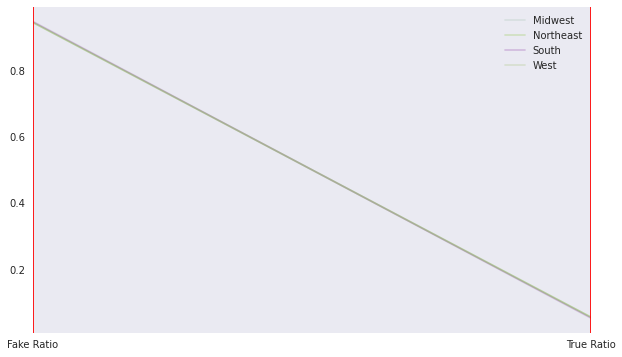

In [89]:
mean_state = df1.groupby("State").mean()
mean_region = df2.groupby("Region").mean()

mean_state.reset_index(inplace = True)
mean_region.reset_index(inplace = True)

import matplotlib.pyplot as plt
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(10,6))
    pd.plotting.parallel_coordinates(mean_region, "Region",
                                     cols= ["Fake Ratio", "True Ratio"],
                                     alpha=0.2,
                                     axvlines_kwds={"color":"red"})
    plt.title("")



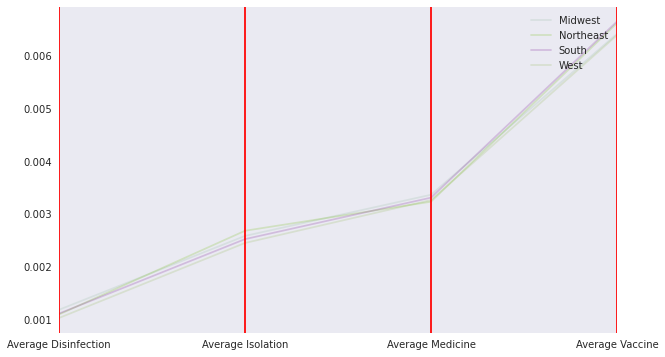

In [90]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(10,6))
    pd.plotting.parallel_coordinates(mean_region, "Region",
                                     cols= ['Average Disinfection', 'Average Isolation', 'Average Medicine', 'Average Vaccine'],
                                     alpha=0.2,
                                     axvlines_kwds={"color":"red"})
    plt.title("")



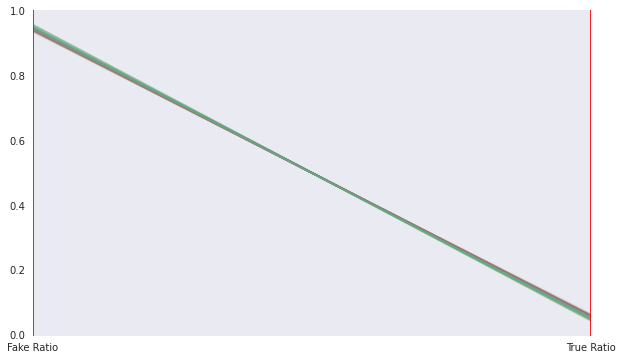

In [91]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(10,6))
    pd.plotting.parallel_coordinates(mean_state, "State",
                                     cols= ["Fake Ratio", "True Ratio"],
                                     alpha=0.2,
                                    axvlines_kwds={"color":"red"})
    plt.legend('',frameon=False)
    plt.title("")

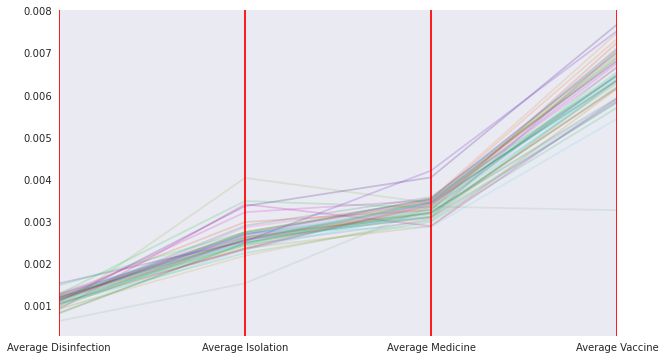

In [92]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(10,6))
    pd.plotting.parallel_coordinates(mean_state, "State",
                                     cols= ['Average Disinfection', 'Average Isolation', 'Average Medicine', 'Average Vaccine'],
                                     alpha=0.2,
                                     axvlines_kwds={"color":"red"})
    plt.legend('',frameon=False)
    plt.title("")

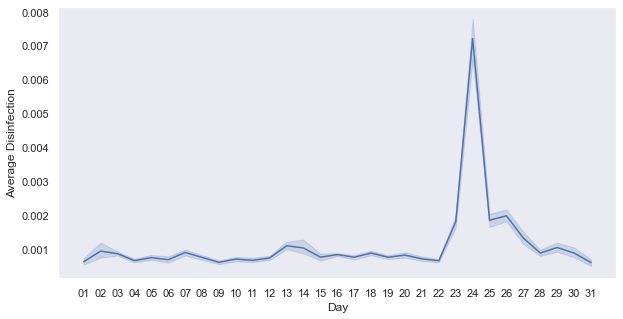

In [95]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Disinfection",data=df1)
sns.set(style='dark',)
plt.show()

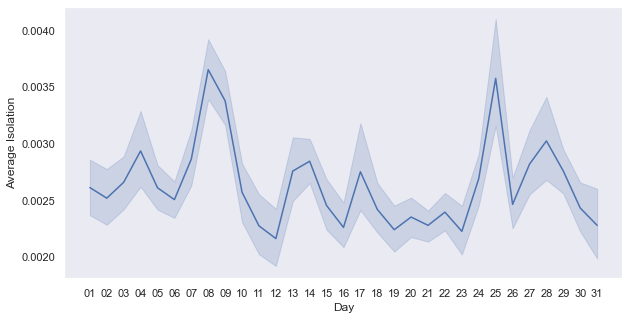

In [94]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Isolation",data=df1)
sns.set(style='dark',)
plt.show()

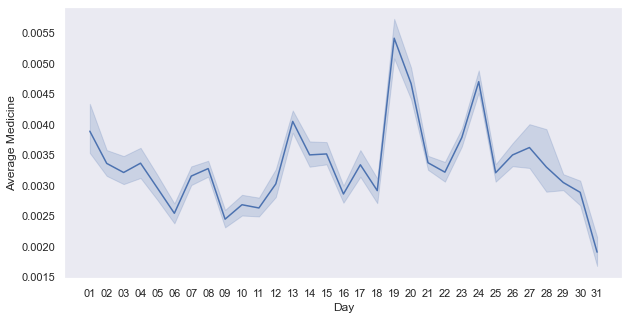

In [96]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Medicine",data=df1)
sns.set(style='dark',)
plt.show()

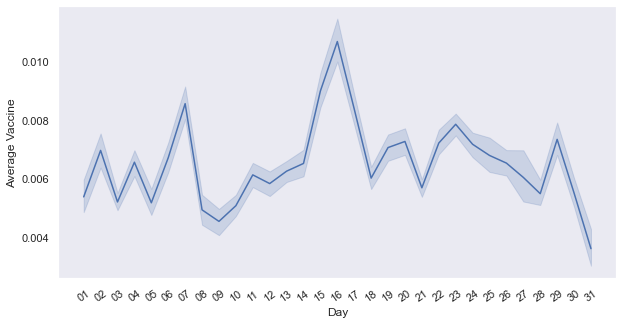

In [97]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Vaccine",data=df1)
sns.set(style='dark',)

plt.xticks(rotation=35)

plt.show()

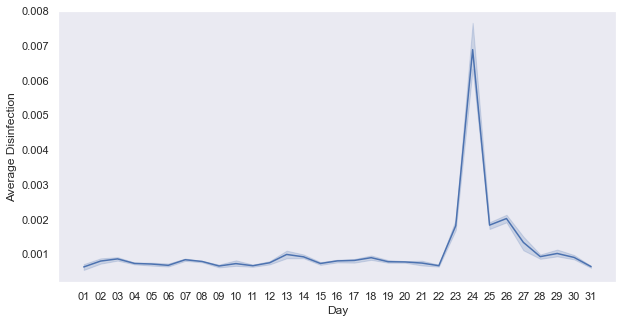

In [98]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Disinfection",data=df2)
sns.set(style='dark',)
plt.show()

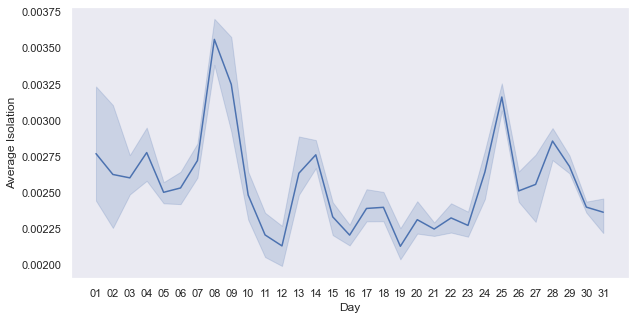

In [99]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Isolation",data=df2)
sns.set(style='dark',)
plt.show()

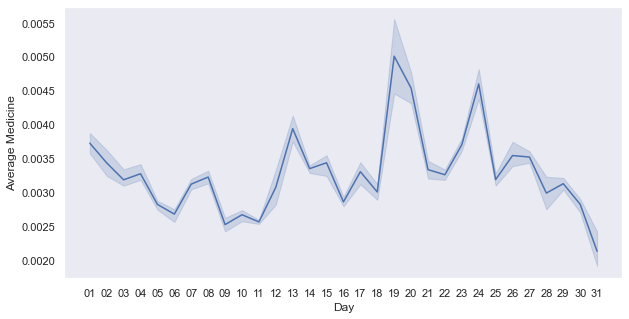

In [100]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Medicine",data=df2)
sns.set(style='dark',)
plt.show()

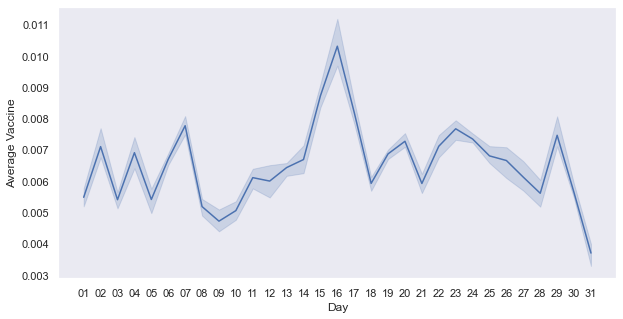

In [101]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x = "Day", y = "Average Vaccine",data=df2)
sns.set(style='dark',)
plt.show()

In [102]:
from scipy import stats
np.random.seed(123456789)  
West = df2[df2["Region"] == 'West']
Midwest = df2[df2["Region"] == "Midwest"]
South = df2[df2["Region"] == "South"]
Northeast = df2[df2["Region"] == "Northeast"]


In [103]:
averageVaccine_df = pd.DataFrame({"Region": ["West", "Northeast", "South", "Midwest"], 
                                  "West":
                                  [stats.ks_2samp(West["Average Vaccine"], West["Average Vaccine"])[1], 
                                   stats.ks_2samp(Northeast["Average Vaccine"], West["Average Vaccine"])[1], 
                                   stats.ks_2samp(South["Average Vaccine"], West["Average Vaccine"])[1],
                                   stats.ks_2samp(Midwest["Average Vaccine"], West["Average Vaccine"])[1]], 
                                  "Northeast":
                                  [stats.ks_2samp(West["Average Vaccine"], Northeast["Average Vaccine"])[1], 
                                   stats.ks_2samp(Northeast["Average Vaccine"], Northeast["Average Vaccine"])[1], 
                                   stats.ks_2samp(South["Average Vaccine"], Northeast["Average Vaccine"])[1], 
                                   stats.ks_2samp(Midwest["Average Vaccine"], Northeast["Average Vaccine"])[1]],
                             "South" : 
                                  [stats.ks_2samp(South["Average Vaccine"], West["Average Vaccine"])[1] ,
                                   stats.ks_2samp(South["Average Vaccine"], Northeast["Average Vaccine"])[1],
                                   stats.ks_2samp(South["Average Vaccine"], South["Average Vaccine"])[1],
                                   stats.ks_2samp(Midwest["Average Vaccine"], South["Average Vaccine"])[1]],
                                "Midwest": 
                                  [stats.ks_2samp(Midwest["Average Vaccine"], West["Average Vaccine"])[1],
                                   stats.ks_2samp(Midwest["Average Vaccine"], Northeast["Average Vaccine"])[1],
                                   stats.ks_2samp(South["Average Vaccine"], Midwest["Average Vaccine"])[1],  
                                   stats.ks_2samp(Midwest["Average Vaccine"], Midwest["Average Vaccine"])[1]]})

averageVaccine_df

,Region,West,Northeast,South,Midwest
0,West,1.000000,0.413545,0.413545,0.999115
1,Northeast,0.413545,1.000000,0.963430,0.615054
2,South,0.413545,0.963430,1.000000,0.615054
3,Midwest,0.999115,0.615054,0.615054,1.000000


In [104]:
averageDis_df = pd.DataFrame({"Region": ["West", "Northeast", "South", "Midwest"], 
                                  "West":
                                  [stats.ks_2samp(West["Average Disinfection"], West["Average Disinfection"])[1], 
                                   stats.ks_2samp(Northeast["Average Disinfection"], West["Average Disinfection"])[1], 
                                   stats.ks_2samp(South["Average Disinfection"], West["Average Disinfection"])[1],
                                   stats.ks_2samp(Midwest["Average Disinfection"], West["Average Disinfection"])[1]], 
                                  "Northeast":
                                  [stats.ks_2samp(West["Average Disinfection"], Northeast["Average Disinfection"])[1], 
                                   stats.ks_2samp(Northeast["Average Disinfection"], Northeast["Average Disinfection"])[1], 
                                   stats.ks_2samp(South["Average Disinfection"], Northeast["Average Disinfection"])[1], 
                                   stats.ks_2samp(Midwest["Average Disinfection"], Northeast["Average Disinfection"])[1]],
                             "South" : 
                                  [stats.ks_2samp(South["Average Disinfection"], West["Average Disinfection"])[1] ,
                                   stats.ks_2samp(South["Average Disinfection"], Northeast["Average Disinfection"])[1],
                                   stats.ks_2samp(South["Average Disinfection"], South["Average Disinfection"])[1],
                                   stats.ks_2samp(Midwest["Average Disinfection"], South["Average Disinfection"])[1]],
                                "Midwest": 
                                  [stats.ks_2samp(Midwest["Average Disinfection"], West["Average Disinfection"])[1],
                                   stats.ks_2samp(Midwest["Average Disinfection"], Northeast["Average Disinfection"])[1],
                                   stats.ks_2samp(South["Average Disinfection"], Midwest["Average Disinfection"])[1],  
                                   stats.ks_2samp(Midwest["Average Disinfection"], Midwest["Average Disinfection"])[1]]})

averageDis_df





,Region,West,Northeast,South,Midwest
0,West,1.000000,0.615054,0.823454,0.413545
1,Northeast,0.615054,1.000000,0.999115,0.823454
2,South,0.823454,0.999115,1.000000,0.963430
3,Midwest,0.413545,0.823454,0.963430,1.000000


In [105]:
averageISO_df = pd.DataFrame({"Region": ["West", "Northeast", "South", "Midwest"], 
                                  "West":
                                  [stats.ks_2samp(West["Average Isolation"], West["Average Isolation"])[1], 
                                   stats.ks_2samp(Northeast["Average Isolation"], West["Average Isolation"])[1], 
                                   stats.ks_2samp(South["Average Isolation"], West["Average Isolation"])[1],
                                   stats.ks_2samp(Midwest["Average Isolation"], West["Average Isolation"])[1]], 
                                  "Northeast":
                                  [stats.ks_2samp(West["Average Isolation"], Northeast["Average Isolation"])[1], 
                                   stats.ks_2samp(Northeast["Average Isolation"], Northeast["Average Isolation"])[1], 
                                   stats.ks_2samp(South["Average Isolation"], Northeast["Average Isolation"])[1], 
                                   stats.ks_2samp(Midwest["Average Isolation"], Northeast["Average Isolation"])[1]],
                             "South" : 
                                  [stats.ks_2samp(South["Average Isolation"], West["Average Isolation"])[1] ,
                                   stats.ks_2samp(South["Average Isolation"], Northeast["Average Isolation"])[1],
                                   stats.ks_2samp(South["Average Isolation"], South["Average Isolation"])[1],
                                   stats.ks_2samp(Midwest["Average Isolation"], South["Average Isolation"])[1]],
                                "Midwest": 
                                  [stats.ks_2samp(Midwest["Average Isolation"], West["Average Isolation"])[1],
                                   stats.ks_2samp(Midwest["Average Isolation"], Northeast["Average Isolation"])[1],
                                   stats.ks_2samp(South["Average Isolation"], Midwest["Average Isolation"])[1],  
                                   stats.ks_2samp(Midwest["Average Isolation"], Midwest["Average Isolation"])[1]]})

averageISO_df


,Region,West,Northeast,South,Midwest
0,West,1.000000,0.007946,0.615054,0.256045
1,Northeast,0.007946,1.000000,0.256045,0.615054
2,South,0.615054,0.256045,1.000000,0.823454
3,Midwest,0.256045,0.615054,0.823454,1.000000


In [106]:
averageMed_df = pd.DataFrame({"Region": ["West", "Northeast", "South", "Midwest"], 
                                  "West":
                                  [stats.ks_2samp(West["Average Medicine"], West["Average Medicine"])[1], 
                                   stats.ks_2samp(Northeast["Average Medicine"], West["Average Medicine"])[1], 
                                   stats.ks_2samp(South["Average Medicine"], West["Average Medicine"])[1],
                                   stats.ks_2samp(Midwest["Average Medicine"], West["Average Medicine"])[1]], 
                                  "Northeast":
                                  [stats.ks_2samp(West["Average Medicine"], Northeast["Average Medicine"])[1], 
                                   stats.ks_2samp(Northeast["Average Medicine"], Northeast["Average Medicine"])[1], 
                                   stats.ks_2samp(South["Average Medicine"], Northeast["Average Medicine"])[1], 
                                   stats.ks_2samp(Midwest["Average Medicine"], Northeast["Average Medicine"])[1]],
                             "South" : 
                                  [stats.ks_2samp(South["Average Medicine"], West["Average Medicine"])[1] ,
                                   stats.ks_2samp(South["Average Medicine"], Northeast["Average Medicine"])[1],
                                   stats.ks_2samp(South["Average Medicine"], South["Average Medicine"])[1],
                                   stats.ks_2samp(Midwest["Average Medicine"], South["Average Medicine"])[1]],
                                "Midwest": 
                                  [stats.ks_2samp(Midwest["Average Medicine"], West["Average Medicine"])[1],
                                   stats.ks_2samp(Midwest["Average Medicine"], Northeast["Average Medicine"])[1],
                                   stats.ks_2samp(South["Average Medicine"], Midwest["Average Medicine"])[1],  
                                   stats.ks_2samp(Midwest["Average Medicine"], Midwest["Average Medicine"])[1]]})

averageMed_df



,Region,West,Northeast,South,Midwest
0,West,1.000000,0.823454,0.963430,0.413545
1,Northeast,0.823454,1.000000,0.823454,0.615054
2,South,0.963430,0.823454,1.000000,0.615054
3,Midwest,0.413545,0.615054,0.615054,1.000000
